In [1]:
import torch
import random
import matplotlib.pyplot as plt

In [2]:
def visualize(image, apply_conv = True, apply_pool = True, conv_kernel_size = (3,3), pool_kernel_size = (3,3), num_iter = 10, channels = 5):
    x = image.unsqueeze(0)
    in_channels = 1
    out_channels = channels
    row = 0
    print(f'Original {x.size()}')
    plt.imshow(x.permute(1, 2, 0).int())
    plt.show()
    nrows=num_iter*(apply_conv + apply_pool)
    fig, ax = plt.subplots(nrows=nrows, ncols=channels)
    fig.set_figwidth(channels * 2)
    fig.set_figheight(nrows * 2)
    
    def apply_layer(x, layer, name, kernel_size, row):
        if x.size()[1:] <= kernel_size:
            for r in range(row, nrows):
                for col in range(channels):
                    ax[r, col].set_axis_off()
            return None
        x = layer(x)
        for col in range(out_channels):
            feature_map = x[col]
            ax[row, col].imshow(feature_map.int())
            ax[row, col].set_axis_off()
            ax[row, 0].set_title(f'Conv {x.size()}')
        return x
    
    for i in range(num_iter):
        conv = torch.nn.Conv2d(in_channels, out_channels, conv_kernel_size)
        pool = torch.nn.MaxPool2d(pool_kernel_size)
        if apply_conv:
            x = apply_layer(x, conv, 'Conv', conv_kernel_size, row)
            if x == None:
                break
            row += 1
        if apply_pool:
            x = apply_layer(x, pool, 'Pool', pool_kernel_size, row)
            if x == None:
                break
            row += 1
                    
        in_channels = out_channels

# ImageNet

In [3]:
PATH_TO_DATA = '/kaggle/input/imagenet-object-localization-challenge/ILSVRC/Data/CLS-LOC/train/n01440764'

In [4]:
import os
import cv2

class Dataset(torch.utils.data.Dataset):

    def __init__(self, data_dir: str):
        self.data_dir = data_dir

    def __len__(self):
        return len(self.image_ids)

    def __getitem__(self, idx: int):
        image_id = os.listdir(self.data_dir)[idx]
        image_path = os.path.join(self.data_dir, image_id)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        image = torch.tensor(image, dtype = torch.float32)
        return image

imagenet_data = Dataset(PATH_TO_DATA)

Original torch.Size([1, 1200, 1600])


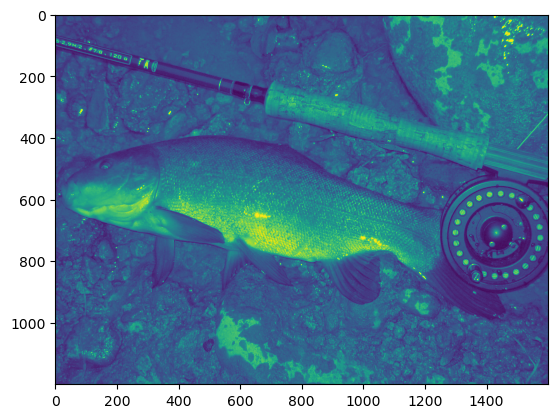

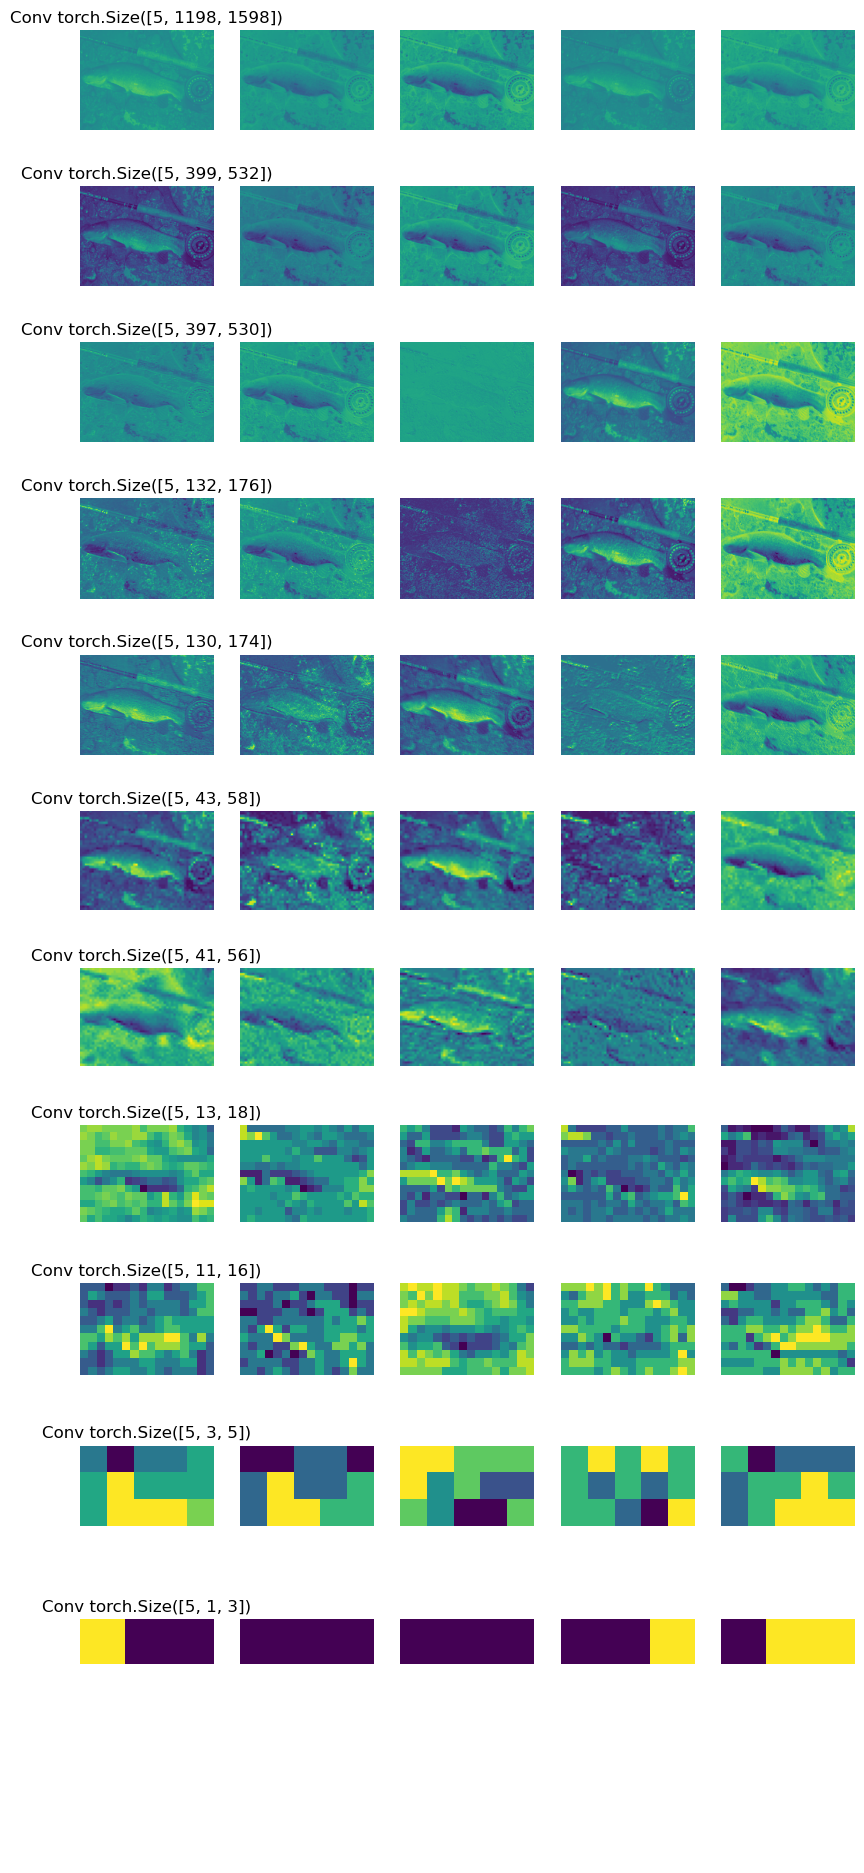

In [5]:
visualize(imagenet_data[0], num_iter = 6)

# MNIST

In [6]:
from tensorflow.keras.datasets import mnist
(mnist_data, _), (_, _) = mnist.load_data()
mnist_data = torch.tensor(mnist_data, dtype = torch.float32)
mnist_data.size()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

11490434/11490434 [==============================] - 0s 0us/step


torch.Size([60000, 28, 28])

Original torch.Size([1, 28, 28])


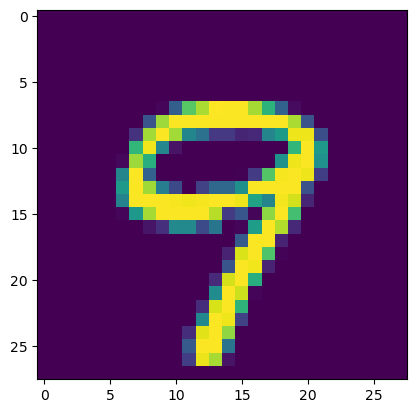

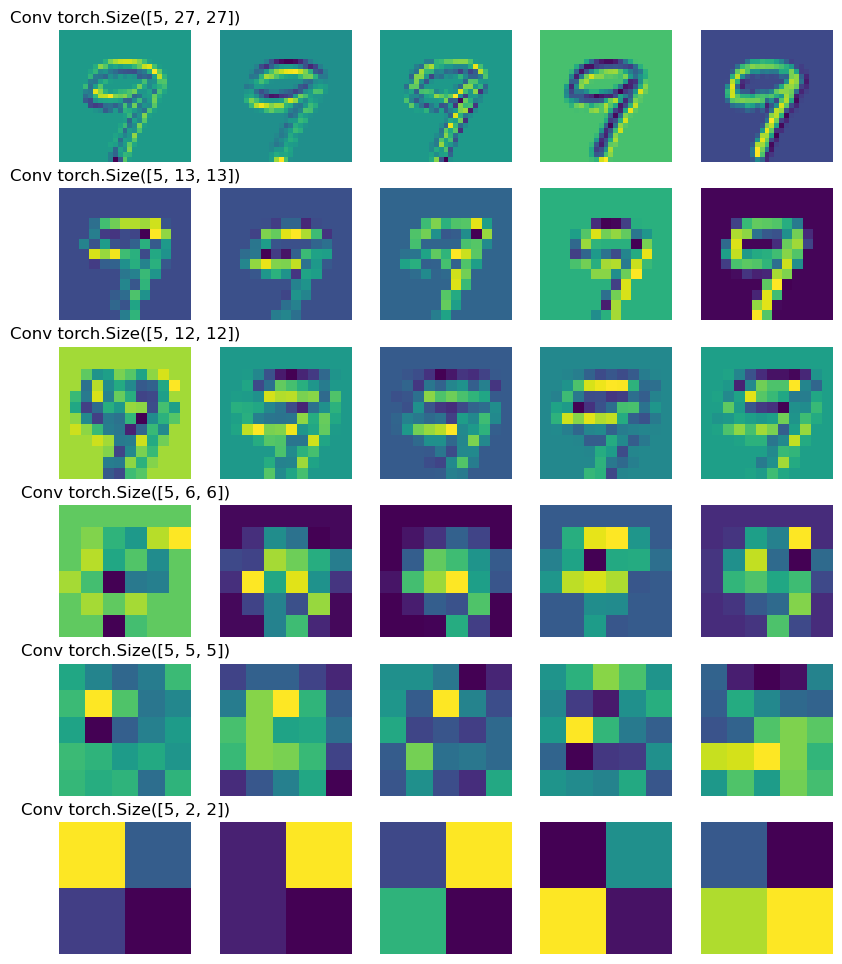

In [7]:
i = random.randint(0, mnist_data.size(0))
visualize(mnist_data[i], conv_kernel_size = (2,2), pool_kernel_size = (2,2), num_iter=3)